In [16]:
!pip install tensorflow
!pip install opencv.python
!pip install opencv.contrib.python


import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import images
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ImportError: cannot import name 'images' from 'tensorflow.keras.preprocessing' (C:\Users\bhavy\AppData\Roaming\Python\Python311\site-packages\keras\api\_v2\keras\preprocessing\__init__.py)

In [18]:
# data preprocessing
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"D:\User Profile Data\Desktop\prog\python\projects\Detecting Forest Fire\forest_fire_dataset\Training and Validation",
                                          target_size=(150, 150),
                                          batch_size=32,
                                          class_mode='binary')

test_dataset = test.flow_from_directory(r"D:\User Profile Data\Desktop\prog\python\projects\Detecting Forest Fire\forest_fire_dataset\Testing",
                                          target_size=(150, 150),
                                          batch_size=32,
                                          class_mode='binary')

#flow_from_directory ==> loads the images from the specified directories, resizes them to the target size of (150, 150), and creates batches of images along with their corresponding labels.

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [19]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

### Model Buliding

In [55]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [56]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
r = model.fit(train_dataset, epochs=7,validation_data= test_dataset)

Epoch 1/7
58/58 [==============================] - 59s 988ms/step - loss: 0.2031 - accuracy: 0.9219 - val_loss: 0.2484 - val_accuracy: 0.9118
Epoch 2/7
58/58 [==============================] - 57s 981ms/step - loss: 0.1436 - accuracy: 0.9514 - val_loss: 0.2947 - val_accuracy: 0.9265
Epoch 3/7
58/58 [==============================] - 55s 954ms/step - loss: 0.1495 - accuracy: 0.9558 - val_loss: 0.2643 - val_accuracy: 0.8529
Epoch 4/7
58/58 [==============================] - 54s 926ms/step - loss: 0.1107 - accuracy: 0.9662 - val_loss: 0.4301 - val_accuracy: 0.8235
Epoch 5/7
58/58 [==============================] - 53s 913ms/step - loss: 0.1062 - accuracy: 0.9678 - val_loss: 0.1718 - val_accuracy: 0.9706
Epoch 6/7
58/58 [==============================] - 53s 917ms/step - loss: 0.0836 - accuracy: 0.9733 - val_loss: 0.1651 - val_accuracy: 0.9265
Epoch 7/7
58/58 [==============================] - 66s 1s/step - loss: 0.0823 - accuracy: 0.9727 - val_loss: 0.2283 - val_accuracy: 0.8971


In [58]:
pred = model.predict(test_dataset)
pred = np.round(pred)

3/3 [==============================] - 1s 139ms/step


In [59]:
pred

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [60]:
print(len(pred))

68


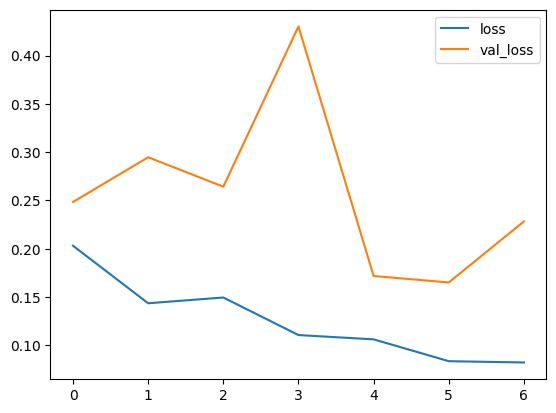

In [61]:
#loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

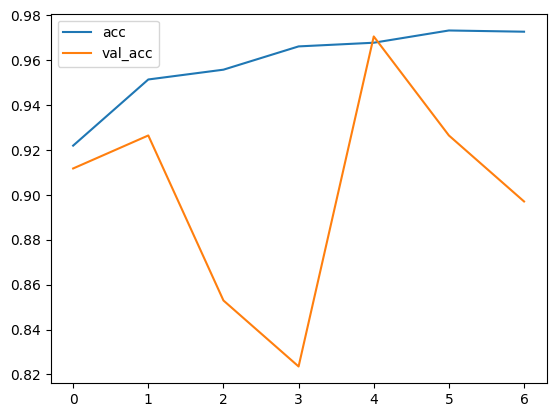

In [62]:
#accuracy 

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [63]:
# taing individual images from the dataset, load and check results.

def predimg(filename):
    img1 = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img1)
    
    y = image.img_to_array(img1)
    x = np.expand_dims(y, axis=0)
    val = model.predict(x)
    print(val)
    if val == 1:
        plt.xlabel("No fire", fontsize=30)
    elif val == 0:
        plt.xlabel("Fire", fontsize=30)


1/1 [==============================] - 0s 142ms/step
[[0.]]


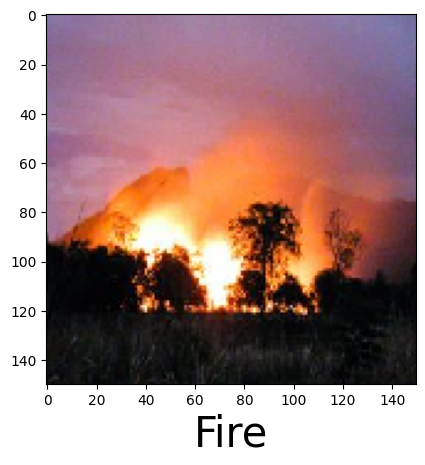

In [64]:
predimg(r"D:\User Profile Data\Desktop\prog\python\projects\Detecting Forest Fire\forest_fire_dataset\Testing\fire\abc183.jpg")